In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers.legacy import Adam
from keras.regularizers import l2
from keras.utils import np_utils
%matplotlib inline

In [19]:
train_ds = tf.data.Dataset.load('../datasets/train_ds')
validation_ds = tf.data.Dataset.load('../datasets/test_ds')

In [20]:
train_ds = train_ds.batch(64)
validation_ds = validation_ds.batch(64)
img, label = next(train_ds.as_numpy_iterator())

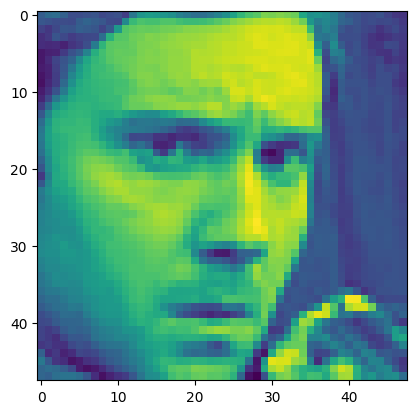

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.

In [21]:
plt.imshow(img[0])
plt.show()
print(label)
print(img)

In [22]:
# Initialising the CNN
model = Sequential()
# 1 - Convolution
model.add(Conv2D(128,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_12 (Bat  (None, 48, 48, 128)      512       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 128)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 256)      

In [23]:
#Compliling the model
# model.compile(loss=categorical_crossentropy,
#               optimizer=Adam(),
#               metrics=['accuracy'])

#Training the model
# train_ds = train_ds.shuffle(1000, reshuffle_each_iteration=True)
history = model.fit(train_ds,
          batch_size=64,
          epochs=5,
          verbose=1,
          validation_data=(validation_ds),
          shuffle=True)


Epoch 1/5
1118/1118 [==============================] - 83s 73ms/step - loss: 1.4436 - accuracy: 0.4592 - val_loss: 1.3710 - val_accuracy: 0.4775
Epoch 2/5
1118/1118 [==============================] - 81s 72ms/step - loss: 1.1259 - accuracy: 0.5805 - val_loss: 1.3066 - val_accuracy: 0.4783
Epoch 3/5
1118/1118 [==============================] - 81s 72ms/step - loss: 1.0114 - accuracy: 0.6254 - val_loss: 1.2579 - val_accuracy: 0.5093
Epoch 4/5
1118/1118 [==============================] - 81s 72ms/step - loss: 0.9305 - accuracy: 0.6560 - val_loss: 1.2293 - val_accuracy: 0.5470
Epoch 5/5
1118/1118 [==============================] - 81s 72ms/step - loss: 0.8528 - accuracy: 0.6880 - val_loss: 1.1066 - val_accuracy: 0.5855


In [24]:
loss = model.evaluate(validation_ds)
print('Test loss:', loss)

114/114 [==============================] - 3s 25ms/step - loss: 1.1066 - accuracy: 0.5855
Test loss: [1.1066288948059082, 0.5855236053466797]


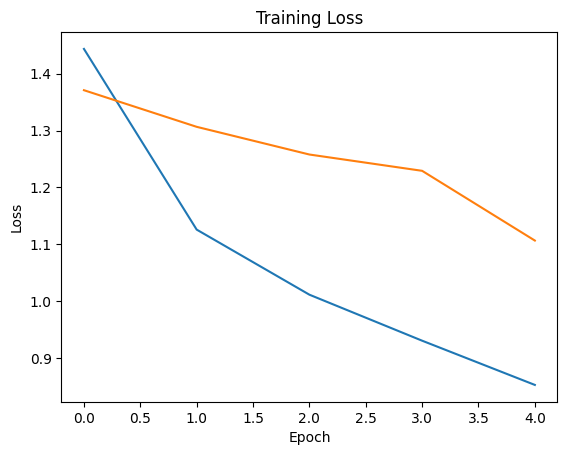

In [25]:
# plot the training loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")